In [257]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

# Constant values
Deg2Rad = math.pi/180
DeltaT = 0.1  

import warnings
warnings.filterwarnings('ignore')

# Forward & Inverse kinematic functions

In [258]:
def zita_dot_robot_frame(phi1_dot, phi2_dot, r, two_l): # phi1_dot and phi2_dot are in degree/s
  x_dot_R = (r/2) * (phi1_dot + phi2_dot) * Deg2Rad
  y_dot_R = 0
  teta_dot_R = (r/two_l)* (phi1_dot - phi2_dot) * Deg2Rad
  return np.array([x_dot_R, y_dot_R, teta_dot_R])  # result in radian/s

In [259]:
def change_frame(zita_dot, teta, inertialFrame): 
  if inertialFrame:           # changing the frame from robot to inertial
    inertialFrame = -1        # R(-teta)
  else:                       # changing the frame from inertial to robot
    inertialFrame = 1         # R(teta)
  teta *= Deg2Rad
  # rotational matrix
  R_matrix = np.array([
    [math.cos(inertialFrame * teta), math.sin(inertialFrame * teta), 0],
    [-1 * math.sin(inertialFrame * teta), math.cos(inertialFrame * teta), 0 ],
    [0, 0, 1]
  ])
  return np.dot(R_matrix, zita_dot)

In [262]:
def wheels_velocity(matrix, r, two_l): 
  phi1_dot, phi2_dot = symbols('phi1_dot phi2_dot')
  eq1 = Eq(matrix[0], (r/2)*(phi1_dot+phi2_dot))
  eq2 = Eq(matrix[2]*Deg2Rad, (r/two_l)*(phi1_dot-phi2_dot))
  sol = solve((eq1, eq2),(phi1_dot, phi2_dot))
  return sol # phi1_dot and phi2_dot are in radian/s

In [263]:
# Forward kinematics
def forward_kinematic(phi1_dot, phi2_dot, teta, r, two_l):
  return change_frame(zita_dot_robot_frame(phi1_dot, phi2_dot, r, two_l), teta, True)  # teta is in degree

# Results (x_dot, y_dot, teta_dot) are in radian/s


In [264]:
# Inverse Kinematics
def inverse_kinematic(matrix, teta, r, two_l):
  return wheels_velocity(change_frame(matrix, teta, False), r, two_l)


# Plots

In [289]:
def forward_plot(x, y, linear_v, angular_v, t_range):
  # evenly sampled time at 1sec intervals
  t = np.arange(0., t_range, 1)

  
  fig, (ax1, ax2) = plt.subplots(2, 1)

  # x - y
  ax1.plot(x, y) 
  ax1.set_xlabel('x', fontsize=12)
  ax1.set_ylabel('y', fontsize=12)

  # teta_dot - t
  #fig, (ax2) = plt.subplots(1, 1)
  ax2.plot(t, angular_v)
  ax2.set_xlabel('t', fontsize=12)
  ax2.set_ylabel('teta_dot', fontsize=12)


In [279]:
# Tracing robot's movement
def move_forward(phi1, phi2, teta, r, two_l):
  t_range = 100000
  x0 = 5
  y0 = 5

  # calculating robot's velocity
  v = forward_kinematic(phi1, phi2, teta, r, two_l)
  v_linear = []
  v_linear.append(v[0])
  v_angular = []
  v_angular.append(v[2])

  # robot's coordinate
  x = []
  x.append(x0)
  y = []
  y.append(y0)

  # robot's velocity in robot frame
  v_local = change_frame(v, teta, False) 
  v_linear = [v_local[0]] * t_range
  v_angular = [v_local[2]] * t_range
  
  # calculating robot's coordinate
  for i in range(1, t_range): 
    x.append(x[i-1]+(DeltaT*v[0]))
    y.append(y[i-1]+(DeltaT*v[1]))
    teta += v[2]*DeltaT
    v = forward_kinematic(phi1, phi2, teta, r, two_l)

  forward_plot(x, y, v_linear, v_angular, t_range)

In [292]:
# Tracing robot's movement
def move_forward_var_phi(phi1, phi2, teta, r, two_l):
  t_range = 2500
  x0 = 5
  y0 = 5

  # calculating robot's velocity
  v = forward_kinematic(phi1, phi2, teta, r, two_l)
  v_linear = []
  v_linear.append(v[0])
  v_angular = []
  v_angular.append(v[2])

  # robot's coordinate
  x = []
  x.append(x0)
  y = []
  y.append(y0)

  # robot's velocity in robot frame
  v_local = change_frame(v, teta, False) 
  v_linear = [v_local[0]] * t_range
  v_angular = [v_local[2]] * t_range
  
  
  # calculating robot's coordinate
  for i in range(1, t_range): 
    x.append(x[i-1]+(DeltaT*v[0]))
    y.append(y[i-1]+(DeltaT*v[1]))
    teta += v[2]*DeltaT
    phi1 += 0.5 * i
    v = forward_kinematic(phi1, phi2, teta, r, two_l)

  forward_plot(x, y, v_linear, v_angular, t_range)

## Plots for question1

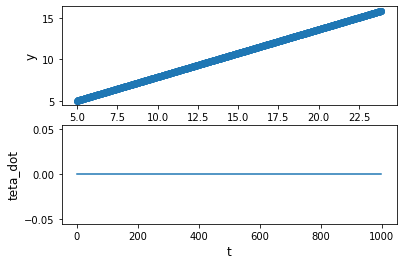

In [273]:
# phi1_dot = phi2_dot = const
move_forward(5, 5, 30, 2.5, 20)

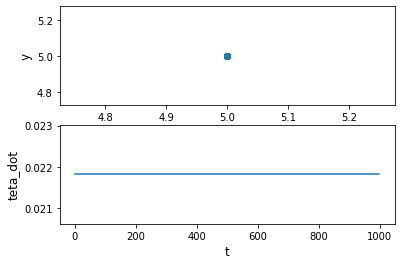

In [274]:
# phi1_dot = const, phi2_dot = - const
move_forward(5, -5, 30, 2.5, 20)

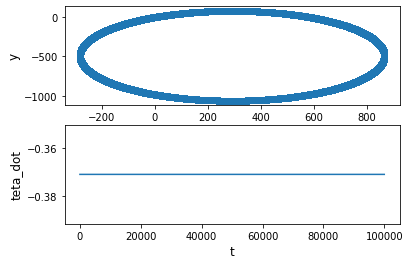

In [280]:
# phi1_dot = 0, phi2_dot = const
move_forward(0, 170, 30, 2.5, 20)

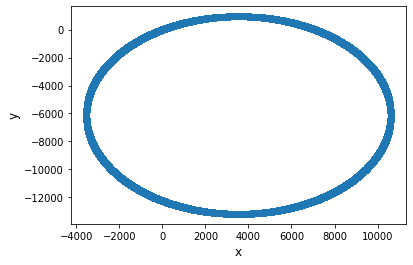

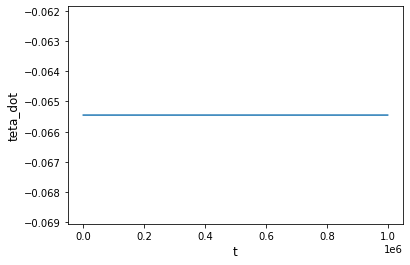

In [63]:
# phi1_dot < phi2_dot
move_forward(170, 200, 30, 2.5, 20)

In [14]:
def inverse_plot(v, teta, r, two_l): 
  phi1_dot, phi2_dot = symbols('phi1_dot phi2_dot')
  move_forward(v[phi1_dot], v[phi2_dot], teta, r, two_l)
  

## Plots for question2

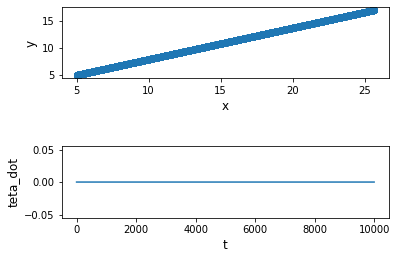

In [16]:
# straight forward movement
# Linear velocity = const, angular velocity = 0
inverse_plot(inverse_kinematic([1, 1, 0], 30, 2.5, 20), 30, 2.5, 20)

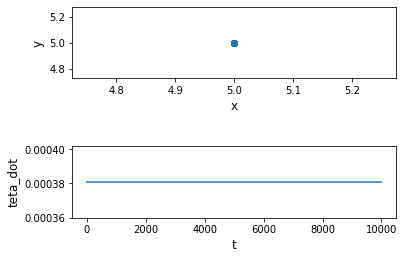

In [17]:
# Circular in-place movement (without changing position)
# Linear velocity = 0, angular velocity = const
inverse_plot(inverse_kinematic([0, 0, 1.25], 30, 2.5, 20), 30, 2.5, 20)

## Plots for question3

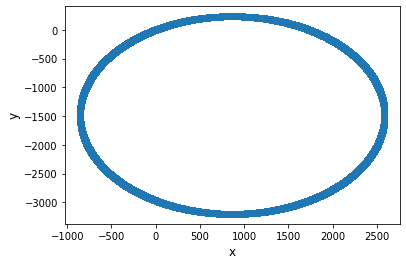

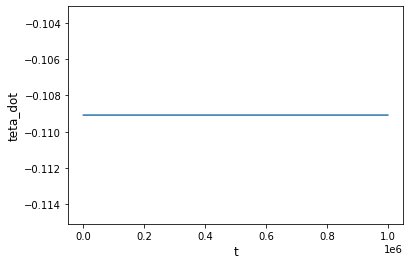

In [64]:
# phi1_dot < phi2_dot  robot is moving around a circle
move_forward(50, 100, 30, 2.5, 20)

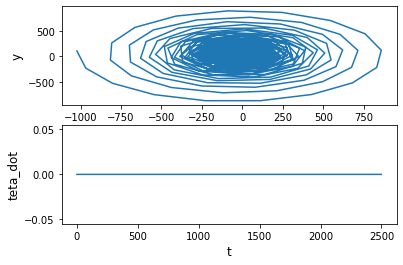

In [293]:
# phi1_dot is variable,  robot is moving in archemedes way
move_forward_var_phi(0.1, 0.1, 30, 0.25, 2)

# Control

In [18]:
def velocity_calculation(x_i, y_i, x_f, y_f, teta):
  teta *= Deg2Rad 
  rho = math.sqrt(math.pow(x_f - x_i, 2) + math.pow(y_f - y_i, 2)) 
  alpha = -1 * teta + math.atan2((y_f - y_i), (x_f - x_i))
  beta = -1 * teta - alpha # beta

  k_rho = 0.5   # k_rho > 0
  k_alpha = 3000  # k_alpha > k_rho
  k_beta = -1000 # k_beta < 0
  
  # linear velocity
  v = k_rho * rho 
  # angular velocity          
  w = k_alpha * alpha + k_beta * beta  

  return [v, 0, w]


In [19]:
def controller(x_i, y_i, x_f, y_f, teta, r, two_l, x_list, y_list):
  
  x_list.append(x_i)
  y_list.append(y_i)

  if (abs(x_i - x_f) < 1) and (abs(y_i - y_f) < 1):  
    # the robot's movement path
    plt.plot(x_list, y_list, 'o') 
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    return

  # Calculating robot's velocity in robot frame
  matrix = change_frame(velocity_calculation(x_i, y_i, x_f, y_f, teta), teta, True)

  # Inverse kinematic to calculate wheels' velocity
  phi1_dot, phi2_dot = symbols('phi1_dot phi2_dot')
  # wheels' velocity in radian/s
  wheel_velocity = inverse_kinematic(matrix, teta, r, two_l) 
  # wheels' velocity in degree/s
  phi1_dot = wheel_velocity[phi1_dot]/Deg2Rad  
  phi2_dot = wheel_velocity[phi2_dot]/Deg2Rad 

  # calculate robot's next destination
  zita_dot = forward_kinematic(phi1_dot, phi2_dot, teta, r, two_l) # x_dot, y_dot, teta_dot
  x_i += DeltaT * zita_dot[0]
  y_i += DeltaT * zita_dot[1]
  teta += DeltaT * zita_dot[2]

  controller(x_i, y_i, x_f, y_f, teta, r, two_l, x_list, y_list)

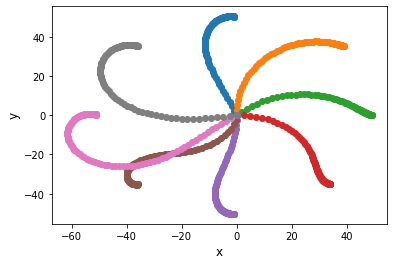

In [20]:
# Test: Starting point in the middle and different destinations
controller(0, 0, 0, 50, 110, 2.5, 20, [], [])
controller(0, 0, 40, 35, 90, 2.5, 20, [], [])
controller(0, 0, 50, 0, 45, 2.5, 20, [], [])
controller(0, 0, 35, -35, 0, 2.5, 20, [], [])
controller(0, 0, 0, -50, -90, 2.5, 20, [], [])
controller(0, 0, -35, -35, -100, 2.5, 20, [], [])
controller(0, 0, -50, 0, 215, 2.5, 20, [], [])
controller(0, 0, -35, 35, 190, 2.5, 20, [], [])


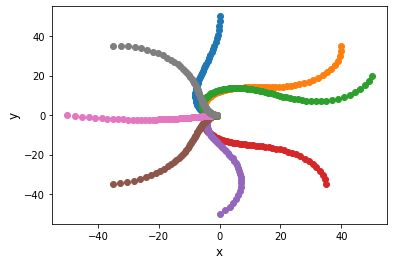

In [51]:
# Test: The destination point is in the middle and the starting points are different
controller(0, 50, 0, 0, -90, 2.5, 20, [], [])
controller(40, 35, 0, 0, -90, 2.5, 20, [], [])
controller(50, 20, 0, 0, -110, 2.5, 20, [], [])
controller(35, -35, 0, 0, 100, 2.5, 20, [], [])
controller(0, -50, 0, 0, 45, 2.5, 20, [], [])
controller(-35, -35, 0, 0, 10, 2.5, 20, [], [])
controller(-50, 0, 0, 0, -10, 2.5, 20, [], [])
controller(-35, 35, 0, 0, 0, 2.5, 20, [], [])